##1. Cargue de la data

In [1]:
#Librerías
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mape
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#Importar datos de entrenamiento

drive.mount('/content/drive')

data_train = pd.read_csv("/content/drive/MyDrive/Colab/Prueba/01_Claudia_Pinzon/train_precios_vivienda.csv")
data_train.head(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-2-a6d880d32744>:5: DtypeWarning: Columns (67,109,110,160,168,169,170,171,178,180) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv("/content/drive/MyDrive/Colab/Prueba/01_Claudia_Pinzon/train_precios_vivienda.csv")


,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,4112,5896,43090.624747,Remate,Remates,GarantÃ­a Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,...,"81968750,00",0,0,0,0,"145318750,00",2522304,"576134,95",0.000000,0.000000
1,7401,10570,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,QUINDÃO,...,0,157,78500000,No,0,713986654,257.23250000000002,2775647.14,-75.661152,4.544027
2,10223,14600,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,...,0,0,0,Si,0,270500000,259.4264,1042684.94,-75.584116,6.277020
3,4170,5967,43091.676139,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,CUNDINAMARCA,...,0,0,0,No,0,"84840000,00",252245,"336339,67",0.000000,0.000000
4,11073,15814,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,VIS,META,...,69306400,0,0,0,0,96346400,259.72770000000003,370951.58,-73.712370,3.565757


In [3]:
#Descripción de la data de entrenamiento

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11571 entries, 0 to 11570
Columns: 222 entries, Unnamed: 0 to Latitud
dtypes: float64(6), int64(18), object(198)
memory usage: 19.6+ MB


In [4]:
#Dimensiones de la data de entrenamiento

data_train.shape

(11571, 222)

In [5]:
#Importar datos de prueba

data_test = pd.read_csv("/content/drive/MyDrive/Colab/Prueba/01_Claudia_Pinzon/test_precios_vivienda.csv", header=None, sep=';')
data_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,...,area_terreno,valor_area_terreno,area_construccion,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,Longitud,Latitud
1,2243,430.144.469.211.111,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,MAGDALENA,SANTA MARTA,...,0,0,0,0,0,0,No,0,0.0,0.0
2,500,429.894.007.425.116,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,MAGDALENA,CIENAGA,...,136,27200000,80,44800000,0,0,0,0,0.0,0.0
3,12884,NaN,OriginaciÃ³n,CrÃ©dito hipotecario de vivienda,GarantÃ­a Hipotecaria,Hipotecario,Vivienda,NaN,TOLIMA,MELGAR,...,0,0,0,0,348.23,90539800,No,0,-74.643.383,4.203.572
4,4019,430.486.908.754.861,Originación,Actualización de garantías,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,CESAR,VALLEDUPAR,...,0,0,0,0,0,0,Si,0,0.0,0.0


In [6]:
#Descripción de la data de prueba

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 218 entries, 0 to 217
dtypes: object(218)
memory usage: 712.0+ KB


In [7]:
#Dimensiones de la data de prueba

data_test.shape

(418, 218)

##2. Limpieza de los datos

###2.1 Data_train

In [8]:
# Reemplazar caracteres

data_train.replace({'ÃƒÂ³': 'o', 'ÃƒÂ¡': 'a', 'Ã©': 'e', 'Ã': 'i', 'í³': 'o'}, regex=True, inplace=True)

data_train.head(3)

,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
0,4112,5896,43090.624747,Remate,Remates,Garanti­a Hipotecaria,Remates,Vivienda,NaN,VALLE DEL CAUCA,...,"81968750,00",0,0,0,0,"145318750,00",2522304,"576134,95",0.000000,0.000000
1,7401,10570,NaN,Originacii³n,Credito hipotecario de vivienda,Garanti­a Hipotecaria,Hipotecario,Vivienda,NaN,QUINDiO,...,0,157,78500000,No,0,713986654,257.23250000000002,2775647.14,-75.661152,4.544027
2,10223,14600,NaN,Originacii³n,Credito hipotecario de vivienda,Garanti­a Hipotecaria,Hipotecario,Vivienda,NaN,ANTIOQUIA,...,0,0,0,Si,0,270500000,259.4264,1042684.94,-75.584116,6.277020


In [9]:
#Eliminar filas vacías

data_train = data_train.apply(lambda x: pd.Series(x.dropna().values))

In [10]:
#Eliminar registros en la columna ID tipo texto

data_train['id'] = data_train['id'].astype(str)
data_train = data_train[data_train['id'].apply(lambda x: x.isnumeric())]
data_train['id'] = data_train['id'].astype(int)

In [11]:
#Eliminar registros en la columna ID tipo texto

data_train['valor_total_avaluo'] = data_train['valor_total_avaluo'].astype(object)
data_train = data_train[data_train['valor_total_avaluo'].apply(lambda x: x.isnumeric())]
data_train['valor_total_avaluo'] = data_train['valor_total_avaluo'].astype(float)

In [12]:
#Reemplazar datos en variables

data_train = data_train.replace({'Si': 1, 'No': 0})
data_train.head(3)

,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
1,7401,10570,43091.676139,Originacii³n,Credito hipotecario de vivienda,Garanti­a Hipotecaria,Hipotecario,Vivienda,VIS,QUINDiO,...,0,157,78500000,0,0,713986654.0,257.23250000000002,2775647.14,-75.661152,4.544027
2,10223,14600,43070.637122,Originacii³n,Credito hipotecario de vivienda,Garanti­a Hipotecaria,Hipotecario,Vivienda,VIS,ANTIOQUIA,...,0,0,0,1,0,270500000.0,259.4264,1042684.94,-75.584116,6.277020
4,11073,15814,42990.511397,Originacii³n,Credito hipotecario de vivienda,Garanti­a Hipotecaria,Hipotecario,Vivienda,VIS,META,...,69306400,0,0,0,0,96346400.0,259.72770000000003,370951.58,-73.712370,3.565757


In [13]:
#Tipos de variables

data_train.dtypes

Unnamed: 0               int64
id                       int64
fecha_aprobación       float64
objeto                  object
motivo                  object
                        ...   
valor_total_avaluo     float64
valor_uvr               object
valor_avaluo_en_uvr     object
Longitud               float64
Latitud                float64
Length: 222, dtype: object

In [14]:
#Codificación binaria de variables

conv_variables = ['alcantarillado_en_el_sector', 'acueducto_en_el_sector', 'gas_en_el_sector', 'energia_en_el_sector',
           'telefono_en_el_sector', 'vias_pavimentadas', 'andenes_en_las_vias', 'barrio_legal', 'paradero', 'alumbrado',
           'arborizacion', 'alamedas', 'ciclo_rutas', 'alcantarillado_en_el_predio', 'acueducto_en_el_predio', 'sauna',
           'gas_en_el_predio', 'energia_en_el_predio', 'telefono_en_el_predio','vigilancia_privada','contadores_agua',
           'contadores_luz','bicicletero', 'piscina', 'porteria', 'citofono','tanque_de_agua', 'club_house',
           'garaje_visitantes', 'teatrino', 'administracion']

In [15]:
#Ajustar binarización

for var in conv_variables:
    if var in data_train and data_train[var].dtype == 'object': #Verificar variables tipo objeto

        #Reemplazar comas por puntos para estandarizar decimales
        data_train[var] = data_train[var].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
        try:
            data_train[var] = pd.to_numeric(data_train[var], errors='coerce') #Convertir a tipo numérico (float)
            data_train[var] = data_train[var].fillna(0) #Reemplazar campos vacíos por 0
            data_train[var] = data_train[var].round().astype('Int64') #Redondear y convertir a int
        except:
            print(f"No se pudo convertir la columna '{var}' a tipo int.")

No se pudo convertir la columna 'acueducto_en_el_sector' a tipo int.


/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/integer.py:53: RuntimeWarning: invalid value encountered in cast
  casted = values.astype(dtype, copy=copy)


In [16]:
#Convertir valores($COP) a float

conv_valores = ['estrato','unidades','habitaciones','numero_total_de_garajes', 'total_cupos_parquedaro','valor_area_privada',
           'cuarto_servicio', 'closet', 'sala', 'comedor', 'bano_privado', 'bano_social', 'bano_servicio', 'cocina', 'estudio',
           'balcon', 'terraza','patio_interior', 'jardin', 'zona_de_ropas', 'zona_verde_privada', 'local', 'oficina', 'bodega',
           'numero_total_de_garajes', 'total_cupos_parquedaro', 'valor_area_garaje','valor_area_deposito','valor_area_terreno',
           'valor_area_construccion', 'valor_area_otros','valor_area_libre','valor_total_avaluo','valor_uvr']

# Reemplazar comas por puntos para estandarizar decimales

for valor in conv_valores:

    if valor in data_train.columns and data_train[valor].dtype in ['object', 'float']:
        # Reemplazar comas por puntos si es una cadena
        data_train[valor] = data_train[valor].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)

        try:
            data_train[valor] = pd.to_numeric(data_train[valor], errors='coerce') # Convertir a tipo numérico (float)
            data_train[valor] = data_train[valor].fillna(0) # Reemplazar NaN por 0
            data_train[valor] = data_train[valor].round().astype('Int64') # Redondear y convertir a int
        except Exception as e:
            print(f"No se pudo convertir la columna '{valor}' a tipo numérico. Error: {e}")

In [17]:
#Cantidad de datos faltantes

data_train.isna().sum().sort_values()

Unnamed: 0                       0
estado_acabados_cocina           0
calidad_acabados_cocina          0
tipo_garaje                      0
numero_total_de_garajes          0
                              ... 
descripcion_clase_inmueble     167
descripcion_tipo_inmueble      167
descripcion_uso_inmueble       172
fecha_aprobación              4969
tipo_subsidio                 7505
Length: 222, dtype: int64

###2.2 Data_test

In [18]:
# Reemplazar caracteres especiales

data_test.replace({'ÃƒÂ³': 'ó', 'ÃƒÂ¡': 'á', 'Ã©': 'é', 'Ã': 'í', 'í³': 'ó'}, regex=True, inplace=True)

data_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,208,209,210,211,212,213,214,215,216,217
0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,municipio_inmueble,...,area_terreno,valor_area_terreno,area_construccion,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,Longitud,Latitud
1,2243,430.144.469.211.111,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,MAGDALENA,SANTA MARTA,...,0,0,0,0,0,0,No,0,0.0,0.0
2,500,429.894.007.425.116,Originación,Crédito hipotecario de vivienda,Garantía Hipotecaria,Hipotecario,Vivienda,NaN,MAGDALENA,CIENAGA,...,136,27200000,80,44800000,0,0,0,0,0.0,0.0


In [19]:
#Eliminar filas vacías de data_test

data_test = data_test.apply(lambda x: pd.Series(x.dropna().values))

In [20]:
#Binarización

data_test = data_train.replace({'Si': 1, 'No': 0})
data_test.head(3)

,Unnamed: 0,id,fecha_aprobación,objeto,motivo,proposito,tipo_avaluo,tipo_credito,tipo_subsidio,departamento_inmueble,...,valor_area_construccion,area_otros,valor_area_otros,area_libre,valor_area_libre,valor_total_avaluo,valor_uvr,valor_avaluo_en_uvr,Longitud,Latitud
1,7401,10570,43091.676139,Originacii³n,Credito hipotecario de vivienda,Garanti­a Hipotecaria,Hipotecario,Vivienda,VIS,QUINDiO,...,0,157,78500000,0,0,713986654,257,2775647.14,-75.661152,4.544027
2,10223,14600,43070.637122,Originacii³n,Credito hipotecario de vivienda,Garanti­a Hipotecaria,Hipotecario,Vivienda,VIS,ANTIOQUIA,...,0,0,0,1,0,270500000,259,1042684.94,-75.584116,6.277020
4,11073,15814,42990.511397,Originacii³n,Credito hipotecario de vivienda,Garanti­a Hipotecaria,Hipotecario,Vivienda,VIS,META,...,69306400,0,0,0,0,96346400,260,370951.58,-73.712370,3.565757


In [21]:
#Tipos de variables en test

data_test.dtypes

Unnamed: 0               int64
id                       int64
fecha_aprobación       float64
objeto                  object
motivo                  object
                        ...   
valor_total_avaluo       Int64
valor_uvr                Int64
valor_avaluo_en_uvr     object
Longitud               float64
Latitud                float64
Length: 222, dtype: object

In [22]:
#Cantidad de datos faltantes

data_test.isna().sum().sort_values()

Unnamed: 0                       0
estado_acabados_cocina           0
calidad_acabados_cocina          0
tipo_garaje                      0
numero_total_de_garajes          0
                              ... 
descripcion_clase_inmueble     167
descripcion_tipo_inmueble      167
descripcion_uso_inmueble       172
fecha_aprobación              4969
tipo_subsidio                 7505
Length: 222, dtype: int64

##3. Modelo: Regresión lineal

array([[<Axes: title={'center': 'estrato'}>,
        <Axes: title={'center': 'unidades'}>,
        <Axes: title={'center': 'habitaciones'}>,
        <Axes: title={'center': 'numero_total_de_garajes'}>,
        <Axes: title={'center': 'total_cupos_parquedaro'}>,
        <Axes: title={'center': 'valor_area_privada'}>],
       [<Axes: title={'center': 'cuarto_servicio'}>,
        <Axes: title={'center': 'closet'}>,
        <Axes: title={'center': 'sala'}>,
        <Axes: title={'center': 'comedor'}>,
        <Axes: title={'center': 'bano_privado'}>,
        <Axes: title={'center': 'bano_social'}>],
       [<Axes: title={'center': 'bano_servicio'}>,
        <Axes: title={'center': 'cocina'}>,
        <Axes: title={'center': 'estudio'}>,
        <Axes: title={'center': 'balcon'}>,
        <Axes: title={'center': 'terraza'}>,
        <Axes: title={'center': 'patio_interior'}>],
       [<Axes: title={'center': 'jardin'}>,
        <Axes: title={'center': 'zona_de_ropas'}>,
        <Axes: title

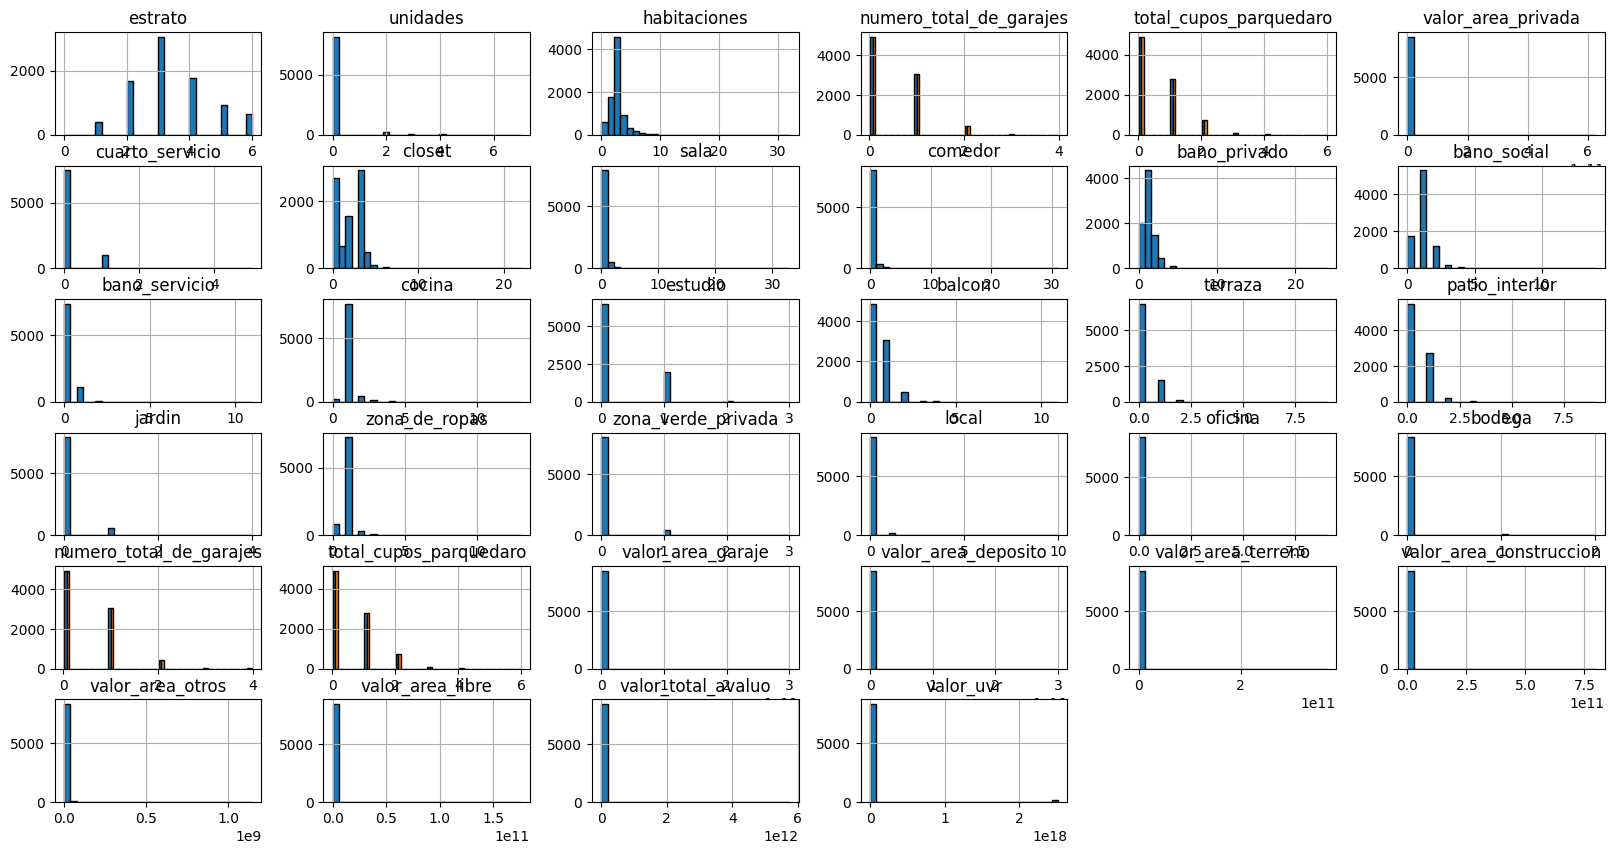

In [23]:
#Distribución de la data en las variables

data_train[conv_valores].hist(figsize=(20,10), bins=30, edgecolor="black")

In [24]:
#Selección de variables para el modelo

x = np.asanyarray(data_train[conv_valores])

y = np.asanyarray(data_train[['valor_total_avaluo']])

In [25]:
#Identificar clases con una sola muestra

clases_unicas, counts = np.unique(y, return_counts=True)
clases = clases_unicas[counts == 1]

if clases.size > 0:
    print("clases a partir e la muestra:", clases)

    #Eliminar muestras con clases que solo aparecen una vez
    indices_to_keep = ~np.isin(y, clases)
    x = x[indices_to_keep.flatten()]
    y = y[indices_to_keep.flatten()]

# Calcular un test_size con al menos una muestra por clase
n_classes = len(np.unique(y))
test_size = max(0.2, n_classes / len(y))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0, stratify=y)

clases a partir e la muestra: [3 300 12000000 ... 1828219999961 4750621999950 5744320000008]


In [26]:
# Crear el modelo
modelo = LinearRegression()

In [27]:
# Entrenamiento del modelo
modelo.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred= modelo.predict(x_test)

In [29]:
#Evaluación por cross validation

pipe = make_pipeline(modelo)

cv_scores = cross_val_score(
                estimator = pipe,
                X         = x_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5)

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-6.67524270e-06 -2.20657368e-06 -1.44158222e-06 -6.99235931e-06
 -1.23319196e-06]
Média métricas de validación cruzada: -3.7097899751563845e-06


In [30]:
# Evaluar el modelo con error cuadrático medio

y_pred_train = modelo.predict(x_train)
print(f'Error cuadrático medio en el conjunto de entrenamiento: {mean_squared_error(y_train, y_pred_train)}')

Error cuadrático medio en el conjunto de entrenamiento: 4.2309635609919565e-13


In [31]:
# Calcular el Error Absoluto Porcentual Promedio (MAPE)

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")

Mean Absolute Percentage Error (MAPE): 57820088993.94%


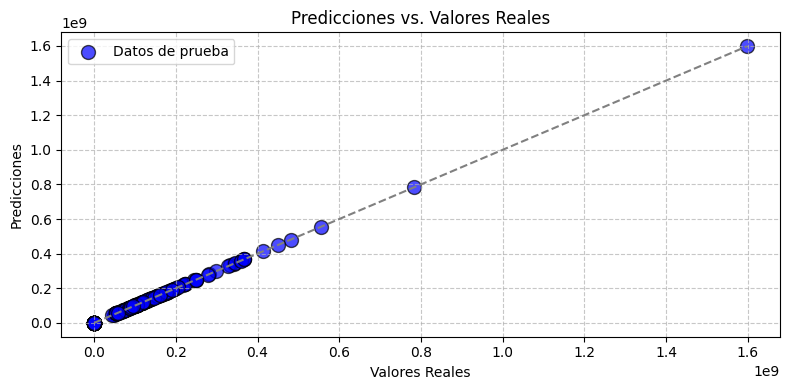

In [32]:
# Gráfico de Predicciones vs. Valores Reales

plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=100, label='Datos de prueba')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray', linestyle='--')
plt.xlabel('Valores Reales', fontsize=10)
plt.ylabel('Predicciones', fontsize=10)
plt.title('Predicciones vs. Valores Reales', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [33]:
# Exportar data a excel

# Assuming y_pred_train corresponds to the first 443 rows of data_train
test_precios = pd.DataFrame({'id': data_train['id'][:len(y_pred_train)],
                             'valor_total_avaluo_predict': y_pred_train.flatten()}) # Flatten y_pred_train to 1D

test_precios.to_csv('test_precios_predict.csv', index=False)